In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,r2_score,ConfusionMatrixDisplay

from sklearn.tree import plot_tree

In [2]:
df=pd.read_csv('')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

In [6]:
df=df.sample(frac=0.1)

In [7]:
df.shape

(420, 785)

In [8]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
39298,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38766,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17755,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2881,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1097,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df.iloc[3,1:]

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 2881, Length: 784, dtype: int64

In [22]:
df.iloc[3,1:].values.reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  49, 255, 110,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  27, 201, 253, 161,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

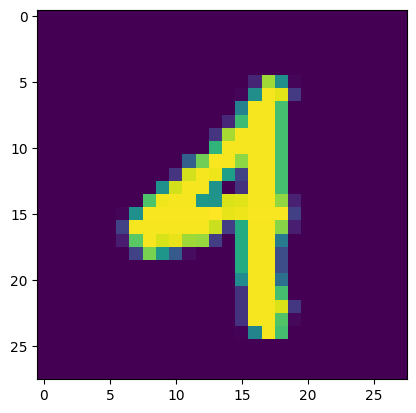

In [29]:
plt.imshow(df.iloc[7,1:].values.reshape(28,28))

In [34]:
df['label'].value_counts()

label
1    64
5    49
7    48
2    43
0    43
6    42
8    35
9    35
4    31
3    30
Name: count, dtype: int64

In [31]:
x=df.drop('label',axis=1)
y=df['label']

In [32]:
x.shape

(420, 784)

In [33]:
y.shape

(420,)

In [35]:
df['label'].unique()

array([6, 4, 2, 1, 5, 0, 9, 7, 3, 8])

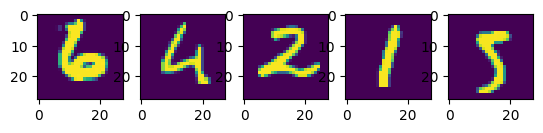

In [42]:
def imshow(x,y,num=5):
    for i in range(num):
        plt.subplot(1,num,i+1)
        plt.imshow(x[i].reshape(28,28))
    plt.show()
        
imshow(x.values,y.values,5)  

In [43]:
#11 split train=75 validation 25%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=42,stratify=y)

In [48]:
knn_model=KNeighborsClassifier(n_neighbors=3,metric='euclidean')
knn_model.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [49]:
y_pred=knn_model.predict(x_test)

In [50]:
y_pred[:5]

array([8, 3, 0, 1, 3])

In [53]:
cm=confusion_matrix(y_test,y_pred)
ac=accuracy_score(y_test,y_pred)

In [55]:
print(cm)


[[11  0  0  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0  0  0]
 [ 1  2  5  1  1  0  0  1  0  0]
 [ 0  0  0  4  0  2  0  0  1  0]
 [ 0  0  0  0  7  0  0  0  0  1]
 [ 1  1  0  0  0 10  0  0  0  0]
 [ 0  1  0  0  1  1  7  0  0  0]
 [ 0  1  0  0  0  0  0 11  0  0]
 [ 0  1  1  0  0  0  0  0  6  1]
 [ 0  0  0  0  1  0  0  0  0  8]]


In [56]:
print(ac)

0.8095238095238095


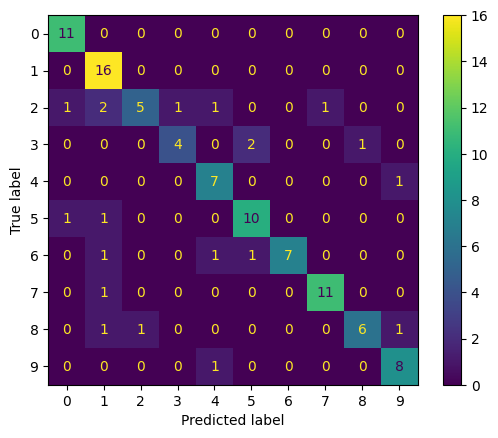

In [58]:
ConfusionMatrixDisplay(cm).plot()

In [ ]:
# do with decision tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=3,random_state=42)

In [61]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

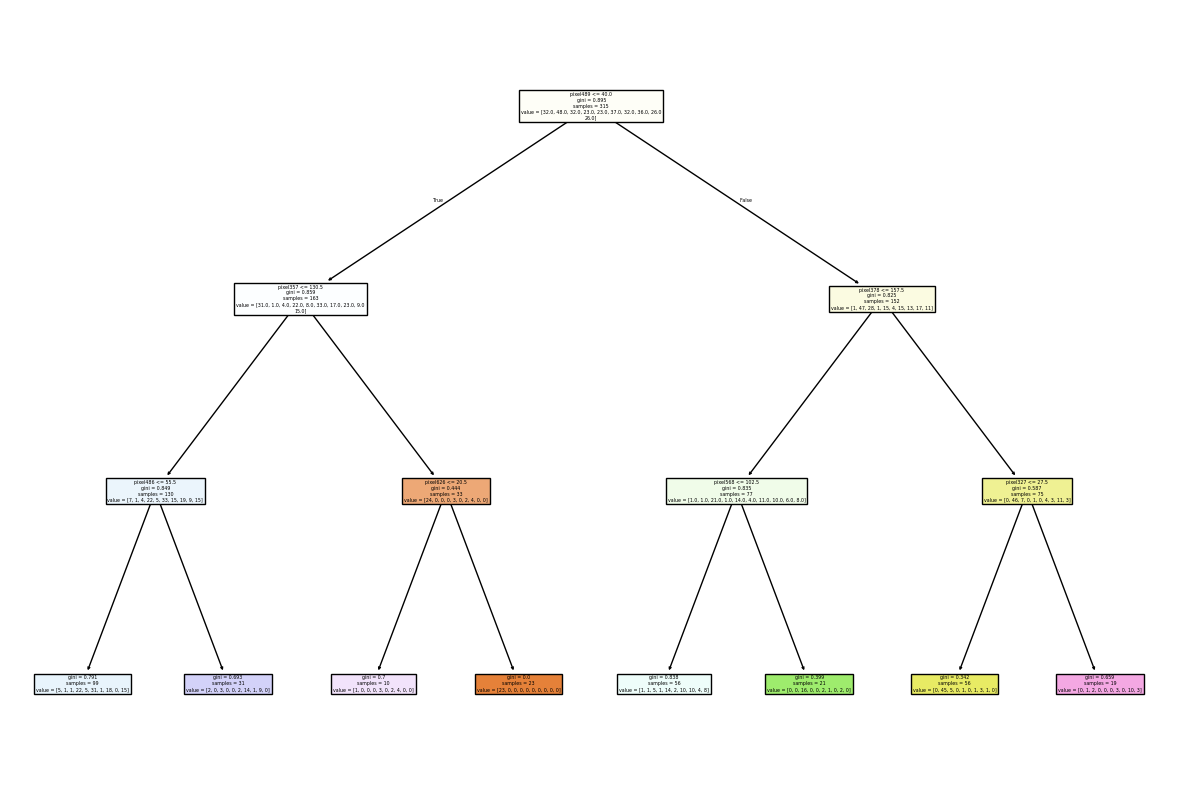

In [83]:
plt.figure(figsize=(15,10))
plot_tree(model,filled=True,feature_names=x.columns)

plt.show()

In [84]:
y_predict=model.predict(x_test)

In [85]:
y_predict[:5]

array([6, 5, 0, 1, 5])

In [90]:
cm2=confusion_matrix(y_test,y_pred)
ac2=accuracy_score(y_test,y_pred)

In [91]:
cm2

array([[ 7,  0,  0,  0,  0,  2,  2,  0,  0,  0],
       [ 0, 14,  0,  0,  0,  1,  0,  0,  1,  0],
       [ 1,  2,  2,  0,  2,  1,  2,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  6,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  3,  3,  0,  0,  0],
       [ 1,  0,  1,  0,  0, 10,  0,  0,  0,  0],
       [ 0,  4,  1,  0,  2,  1,  1,  1,  0,  0],
       [ 1,  0,  0,  0,  3,  6,  0,  1,  1,  0],
       [ 0,  1,  0,  0,  2,  0,  2,  0,  4,  0],
       [ 1,  0,  0,  0,  3,  3,  0,  1,  1,  0]])

In [92]:
ac2

0.3904761904761905

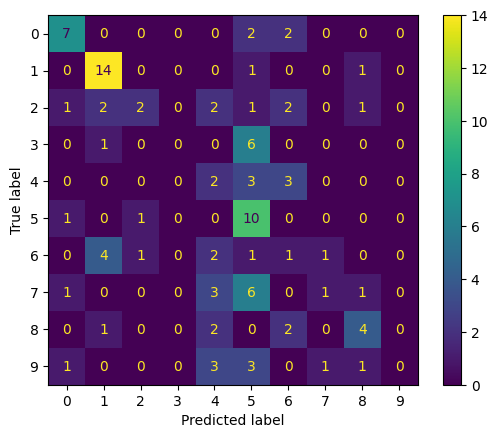

In [95]:
ConfusionMatrixDisplay(cm2).plot()